# Module 8 #

Convert a 3D image into a spherical harmonic representation using CellOrganizer SPHARM-RPDM functionality

Then create both a mesh reconstruction and an image reconstruction from the SPHARM-RPDM representation 


In [14]:
#import packages
from aicsimageio import AICSImage
import numpy as np
from pathlib import Path
from cellorganizer.tools import image2SPHARMparameterization, SPHARMparameterization2image, SPHARMparameterization2mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d

# Image 2 SPHARM PARAMS #

In [15]:
#set options
options = {}
options['NMfirsttry_maxiter'] = 300
options['NMretry_maxiter'] = 100
options['NMretry_maxiterbig'] = 300

# decreasing these numbers decreases compute time but potential reduces model quality
options['NMcost_tol'] = 1e-7
options['NMlargr_tol'] = 1e-7

# degree of spherical harmonic descriptor
options['maxDeg'] = 31
# if the error in the parameterization for a given cell is higher than this, discard that cell
# (note that there is a separate option hd_threshold that controls which cells are in reports)
options['hd_thresh'] = 10

In [16]:
#read in selected image
directory = '/home/murphylab/cellorganizer/local/images/HeLa/3D/processed/'
cellImagesDirectoryPath = Path(directory + 'LAM_cell1_ch1_t1.tif')
img = AICSImage(cellImagesDirectoryPath)

In [17]:
data = img.data 
data = np.squeeze(data) #get it down to a 3D image
data = np.transpose(data, (2, 1, 0)) #transpose to xyz
print(data.shape)
#downsample
data = data[::4,::4,::2]
#make sure data is shaped correctly
print(data.shape)

(1024, 1024, 18)
(256, 256, 9)


In [18]:
params = image2SPHARMparameterization(data, options) #return back descriptors as dict

v2.10 Cellorganizer
R2019 MATLAB


In [19]:
params

{'deg': 31,
 'fvec': array([[ 5.20471504e+02+2.65513095e-16j,  4.79377951e+02+3.71718333e-15j,
          1.29401429e+01+6.51336811e-16j],
        [-4.52259650e+01-8.51891554e+00j,  7.88829252e+01+8.05870579e+00j,
          4.07368368e-01-7.96330166e+00j],
        [-1.59745386e+02+2.17874494e-15j, -5.20354225e+01+4.79323887e-15j,
         -5.90424702e-02+4.05110387e-16j],
        ...,
        [-4.81389408e-02-1.45039299e-02j, -2.02659901e-03+5.38003531e-03j,
         -3.05973464e-02+4.91276317e-03j],
        [-2.45768858e-03+7.67282611e-02j,  1.59069116e-03-2.99770472e-02j,
          1.18803581e-02-1.23271315e-03j],
        [ 5.62515917e-02+2.69149515e-02j,  2.65585121e-02+1.03166664e-02j,
         -1.79895499e-02+8.02580180e-03j]]),
 'vertices': array([[196,  72,   0],
        [197,  72,   0],
        [189,  73,   0],
        ...,
        [160, 183,   9],
        [161, 183,   9],
        [162, 183,   9]], dtype=uint8),
 'faces': array([[13750, 13722,  3840,  3986],
        [13852, 1382

# SPHARM PARAMS 2 MESH #

In [27]:
#set options
options = {}
#options['meshtype.type'] = 'even'
#options['meshtype.nPhi'] = 64
#options['meshtype.nTheta'] = 32

options['meshtype.type'] = 'triangular';
options['meshtype.nVertices'] = 4002;

options['figtitle'] = []
options['plot'] = 0 #show mesh figure
options['dpi'] = 150

In [28]:
mesh_mat = SPHARMparameterization2mesh(params, options)

v2.10 Cellorganizer
R2019 MATLAB


In [29]:
mesh_mat

{'Zvert': array([[ 48.08289922, 108.65808884,   2.21148145],
        [ 48.76648278, 108.85966903,   2.12236889],
        [ 48.38798685, 108.83954107,   2.94094408],
        ...,
        [216.6488799 , 139.55646328,   3.46214202],
        [212.43062348, 146.3927626 ,   3.18063578],
        [213.96223065, 144.06889485,   3.19403916]]),
 'fs': array([[1971, 2115, 2026],
        [1759, 1903, 1814],
        [1759, 1848, 1903],
        ...,
        [3692, 3747, 3713],
        [3692, 3726, 3747],
        [3726, 3781, 3747]], dtype=uint16)}

4002
8000


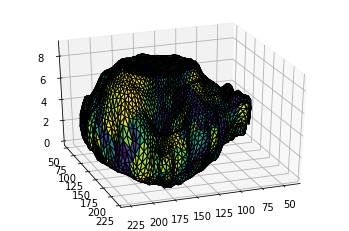

In [40]:
# now create a 3D visualization from the mesh

# vertices
v = mesh_mat['Zvert']
print(len(v))
# faces
f = mesh_mat['fs']-1
print(len(f))

# assign a "color number" equal to the index of the face
C = np.array(list(range(len(mesh_mat['fs']))))
## an alternative is to assign each face a "color number" matching its average z coordinate
#C=np.empty(len(f))
#for itup in range(len(f)):
#    C[itup]=np.mean(v[f[itup]], axis=0)[2]
# normalize the color numbers to range 0-1
norm = plt.Normalize(C.min(), C.max())
# assign a color to each face
colors = plt.cm.viridis(norm(C))

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

pc = art3d.Poly3DCollection(v[f], facecolors=colors, edgecolor="black")
ax.add_collection(pc)
vmins = np.amin(v, axis=0)
vmaxs = np.amax(v, axis=0)
ax.set_xlim(vmins[0], vmaxs[0])
ax.set_ylim(vmins[1], vmaxs[1])
ax.set_zlim(vmins[2], vmaxs[2])

elevation = 30
azimuth = 70
ax.view_init(elevation, azimuth)
plt.show()

# SPHARM PARAMS 2 IMAGE #

In [41]:
img_mat = SPHARMparameterization2image(params, options)

v2.10 Cellorganizer
R2019 MATLAB


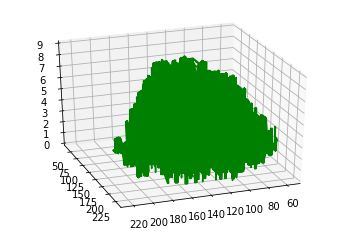

In [43]:
abovezeroind = np.argwhere(img_mat)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.view_init(elev=30, azim=70)  
ax.plot3D(abovezeroind[:,0],abovezeroind[:,1],abovezeroind[:,2],'green')
plt.show()

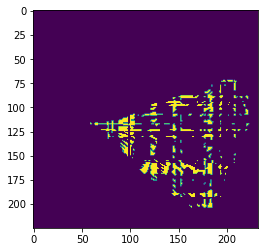

In [45]:
fig = plt.figure()
islice = round(img_mat.shape[2]/2)
plt.imshow(img_mat[:,:,islice])
plt.show()